In [1]:
from typing import List
nums = [-100,-99,3,4]
def maxProduct(nums: List[int]) -> int:
    length = len(nums)
    max_prod = 0
    max_indices = (0, 0)
    for i in range(length):
        current_val = nums[i]
        j = i + 1
        while j < length:          
            next_val = nums[j]
            prod = current_val * next_val
            if prod > max_prod:
                max_vals = (nums[i], nums[j])
                max_prod = prod
            j += 1
    i, j = max_vals      
    max_prod = (i-1) * (j-1)    
    return max_prod
            
maxProduct(nums)   

10100

In [1]:
class City:
    def __init__(self, name):
        self.name = name
        self.routes = {}

    def add_route(self, city, price):
        self.routes[city] = price

    def __repr__(self):
        return self.name

Atlanta = City('Atlanta')
Boston = City('Boston')
Chicago = City('Chicago')
Denver = City('Denver')
ElPaso = City('ElPaso')

Atlanta.add_route(Boston, 100)
Atlanta.add_route(Denver, 160)
Boston.add_route(Chicago, 120)
Boston.add_route(Denver, 180)
Chicago.add_route(ElPaso, 80)
Denver.add_route(Chicago, 40)
Denver.add_route(ElPaso, 140)

In [4]:
def dijkstra_shortest_path(starting_city, final_destination):
    cheapest_prices_table = {}
    cheapest_previous_stopover_city_table = {}

    unvisited_cities = set()

    visited_cities = {}

    cheapest_prices_table[starting_city.name] = 0

    current_city = starting_city

    vist_count = 1
    while current_city:
        print(vist_count, current_city.name, '*'*50)
        visited_cities[current_city.name] = True

        print('before unvisited_cities', unvisited_cities)
        if current_city in unvisited_cities: # because we visiting it right now
            unvisited_cities.remove(current_city)
        print('after unvisited_cities', unvisited_cities)
        for adjacent_city, price in current_city.routes.items():
            print('Adjacent City:', adjacent_city.name, 'Price:',price)

            if adjacent_city.name not in visited_cities:
                unvisited_cities.add(adjacent_city)

            price_through_current_city = cheapest_prices_table[current_city.name] + price

            print("chp",cheapest_prices_table[current_city.name], price)

            if (adjacent_city.name not in cheapest_prices_table or \
                price_through_current_city < cheapest_prices_table[adjacent_city.name]
            ):            
                cheapest_prices_table[adjacent_city.name] = price_through_current_city
                cheapest_previous_stopover_city_table[adjacent_city.name] = current_city.name
                print('Update', cheapest_prices_table)


        print('which unvisited_cities', unvisited_cities)
        if unvisited_cities:
            current_city = min(unvisited_cities, key=lambda city: cheapest_prices_table[city.name])
        else:
            current_city = None
        vist_count += 1

    print(cheapest_prices_table)
    print(cheapest_previous_stopover_city_table)
    shortest_path = []

    current_city_name = final_destination.name 

    while current_city_name != starting_city.name:
        shortest_path.append(current_city_name)
        current_city_name = cheapest_previous_stopover_city_table[current_city_name]
    shortest_path.append(starting_city.name)
    shortest_path.reverse()
    return shortest_path

In [5]:
dijkstra_shortest_path(Atlanta, ElPaso)

1 Atlanta **************************************************
before unvisited_cities set()
after unvisited_cities set()
Adjacent City: Boston Price: 100
chp 0 100
Update {'Atlanta': 0, 'Boston': 100}
Adjacent City: Denver Price: 160
chp 0 160
Update {'Atlanta': 0, 'Boston': 100, 'Denver': 160}
which unvisited_cities {Boston, Denver}
2 Boston **************************************************
before unvisited_cities {Boston, Denver}
after unvisited_cities {Denver}
Adjacent City: Chicago Price: 120
chp 100 120
Update {'Atlanta': 0, 'Boston': 100, 'Denver': 160, 'Chicago': 220}
Adjacent City: Denver Price: 180
chp 100 180
which unvisited_cities {Chicago, Denver}
3 Denver **************************************************
before unvisited_cities {Chicago, Denver}
after unvisited_cities {Chicago}
Adjacent City: Chicago Price: 40
chp 160 40
Update {'Atlanta': 0, 'Boston': 100, 'Denver': 160, 'Chicago': 200}
Adjacent City: ElPaso Price: 140
chp 160 140
Update {'Atlanta': 0, 'Boston': 100, 'De

['Atlanta', 'Denver', 'Chicago', 'ElPaso']

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Example dataset
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler (compute mean and standard deviation)
scaler.fit(X)

# Transform the data
X_scaled = scaler.transform(X)

# Fit and transform the data in one step
X_scaled_fit_transform = scaler.fit_transform(X)


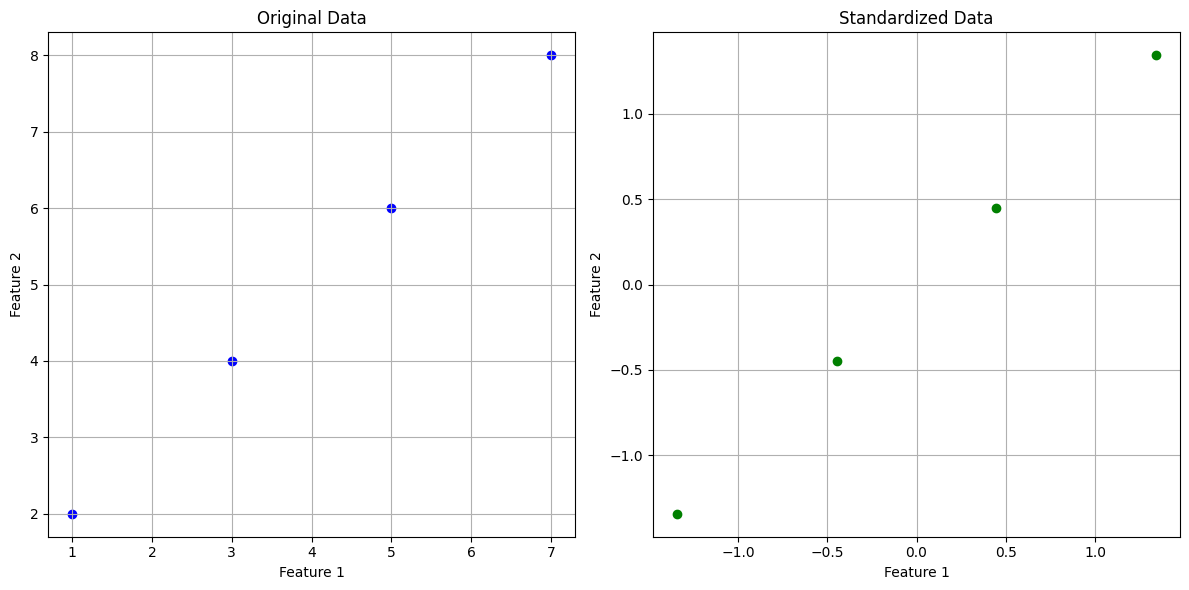

In [2]:
# Original Data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color='blue')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Standardized Data
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color='green')
plt.title('Standardized Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

plt.tight_layout()
plt.show()


In [26]:
import heapq
from typing import List

class Solution:
    def __init__(self):
        self.min_heap = []
        self.max_heap = []
        self.result = []

    def balanceHeaps(self):
        if len(self.max_heap) < len(self.min_heap):
            heapq.heappush(self.max_heap, -heapq.heappop(self.min_heap))
        elif len(self.max_heap) > len(self.min_heap) + 1:
            heapq.heappush(self.min_heap, -heapq.heappop(self.max_heap))

    def removeIndex(self, heap, removeNumber):
        idx = heap.index(removeNumber)
        print("idx",idx)
        last_node = heap[-1]
        print("last node",last_node,heap)
        heap[idx] = last_node
        print(heap)
        del heap[-1]
        print("---->",heap,last_node,removeNumber)
        if idx < len(heap):
            if last_node > removeNumber:
                heapq._siftup(heap, idx)
                print("==>",heap)
            else:
                print("ok",heap)
                heapq._siftdown(heap, 0, idx)
        self.balanceHeaps()

    def medianSlidingWindow(self, nums: List[int], k: int) -> List[float]:
        for ind, num in enumerate(nums):
            # Insert
            if not self.max_heap or num <= -self.max_heap[0]:
                heapq.heappush(self.max_heap, -num)
            else:
                heapq.heappush(self.min_heap, num)
#             print("after push",self.max_heap,self.min_heap,num)
            self.balanceHeaps()
            if (ind+1) - k >= 0:
                if len(self.max_heap) == len(self.min_heap):
                    self.result.append((-self.max_heap[0] + self.min_heap[0]) / 2)
                else:
                    self.result.append(-self.max_heap[0] / 1.0)

                removeNumber = nums[ind+1-k]
#                 print(removeNumber,-self.max_heap[0])
                if removeNumber <= -self.max_heap[0]:
                    self.removeIndex(self.max_heap, -removeNumber)
                else:
                    self.removeIndex(self.min_heap, removeNumber)

        return self.result

# Example usage
nums = [1, 3, -1, -3, 5, 3, 6, 7]
k = 5
solution = Solution()
print(solution.medianSlidingWindow(nums, k))  # Output: [1, -1, -1, 3, 5, 6]


idx 0
last node 1 [-1, 3, 1]
[1, 3, 1]
----> [1, 3] 1 -1
==> [1, 3]
idx 0
last node 1 [-3, 3, 1]
[1, 3, 1]
----> [1, 3] 1 -3
==> [1, 3]
idx 2
last node 1 [-3, 3, 1]
[-3, 3, 1]
----> [-3, 3] 1 1
idx 1
last node -3 [-5, 3, -3]
[-5, -3, -3]
----> [-5, -3] -3 3
ok [-5, -3]
[1.0, 3.0, 3.0, 5.0]


In [25]:
from typing import List
class Solution:
    import heapq
    
    def __init__(self): #init function
        self.max_heap = [] # max heap initialization
        self.min_heap = [] # min heap initialization
        self.res = [] # result array
    
    def balanceHeap(self): #heap balancing function
        if len(self.min_heap) > len(self.max_heap): # check if len of min-heap > max-heap
            heapq.heappush(self.max_heap,-heapq.heappop(self.min_heap))
        elif len(self.max_heap) > len(self.min_heap) + 1: # check len of max_heap > len min_heap + 1
            heapq.heappush(self.min_heap,-heapq.heappop(self.max_heap))
            
    def removeIndex(self,heap,removeNumber): #removing the number from heap after sliding the window
        idx = heap.index(removeNumber)
        last_node = heap[-1]
        heap[idx] = last_node
        del heap[-1]
        if idx < len(heap):
            if last_node > removeNumber:
                heap._siftup(heap,idx)
            else:
                heap._siftdown(heap,0,idx)
        self.balanceHeap()
    
    def slidingMedian(self, nums: List[int], k):
        for ind,num in enumerate(nums):
            if not self.max_heap or num <= -self.max_heap[0]:
                heapq.heappush(self.max_heap,-num)
            else:
                heapq.heappush(self.min_heap,num)
            self.balanceHeap()
            
            if (ind + 1) - k >= 0:
                if len(self.max_heap) == len(self.min_heap):
                    self.res.append((-self.max_heap[0] + self.min_heap[0])/2)
                else:
                    self.res.append(-self.max_heap[0]/1.0)
                removeNumber = nums[ind+1-k]
                if removeNumber <= -self.max_heap[0]:
                     self.removeIndex(self.max_heap, -removeNumber)
                else:
                     self.removeIndex(self.min_heap, removeNumber)
        return self.res
nums = [1, 3, -1, -3, 5, 3, 6, 7]
k = 5
solution = Solution()
print(solution.slidingMedian(nums, k))  # Output: [1, -1, -1, 3, 5, 6]
                
        
            
        

AttributeError: 'list' object has no attribute '_siftup'